In [21]:
!pip install python-igraph

     |████████████████████████████████| 2.0 MB 2.2 MB/s eta 0:00:01


In [25]:
!pip install pycairo

     |████████████████████████████████| 344 kB 2.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycairo: filename=pycairo-1.20.1-cp37-cp37m-macosx_10_9_x86_64.whl size=89977 sha256=a5a18ac01d3ae342602fa5eaffe77e2a4ab4292371da099821676622716b55b4
  Stored in directory: /Users/max/Library/Caches/pip/wheels/0f/a7/3d/d8d8e8bd0cfe5cfb9059ccdd9fb6e0130e65c5a5dac41cc881
Successfully built pycairo


In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import igraph as ig

In [2]:
df = pd.read_csv('komolgorovsmirnov_config_bigann_small.csv')

In [3]:
df

Unnamed: 0        0        1        2        3        4        5  \
0             0  0.00000  0.10097  0.17464  0.13724  0.10299  0.20161   
1             1  0.10097  0.00000  0.09579  0.05696  0.04902  0.11241   
2             2  0.17464  0.09579  0.00000  0.04150  0.08121  0.04168   
3             3  0.13724  0.05696  0.04150  0.00000  0.06246  0.06494   
4             4  0.10299  0.04902  0.08121  0.06246  0.00000  0.11907   
..          ...      ...      ...      ...      ...      ...      ...   
123         123  0.10491  0.03523  0.07264  0.03280  0.03881  0.09723   
124         124  0.09365  0.05601  0.09451  0.07283  0.01330  0.13147   
125         125  0.19937  0.11726  0.04167  0.06299  0.11932  0.00909   
126         126  0.27656  0.19694  0.10230  0.14325  0.18061  0.08453   
127         127  0.19537  0.09728  0.04198  0.06012  0.11966  0.03245   

           6        7        8  ...      118      119      120      121  \
0    0.26836  0.18429  0.30659  ...  0.22578  0.02010  0.01066  0.06275   
1    0.18458  0.08340  0.39206  ...  0.14611  0.10096  0.10304  0.03904   
2    0.09522  0.05022  0.43113  ...  0.05168  0.18757  0.16934  0.12613   
3    0.13376  0.05343  0.41356  ...  0.09242  0.14709  0.13444  0.08562   
4    0.17557  0.11473  0.35270  ...  0.13098  0.12153  0.09401  0.07121   
..       ...      ...      ...  ...      ...      ...      ...      ...   
123  0.16601  0.08378  0.38408  ...  0.12413  0.11559  0.10214  0.05742   
124  0.18786  0.12510  0.34171  ...  0.14296  0.11337  0.08487  0.06587   
125  0.07130  0.07241  0.47183  ...  0.03059  0.20937  0.19701  0.14762   
126  0.01701  0.14170  0.52341  ...  0.05083  0.28960  0.27040  0.22807   
127  0.09667  0.03128  0.47220  ...  0.06366  0.19801  0.19419  0.13513   

         122      123      124      125      126      127  
0    0.13074  0.10491  0.09365  0.19937  0.27656  0.19537  
1    0.06337  0.03523  0.05601  0.11726  0.19694  0.09728  
2    0.04590  0.07264  0.09451  0.04167  0.10230  0.04198  
3    0.02885  0.03280  0.07283  0.06299  0.14325  0.06012  
4    0.03712  0.03881  0.01330  0.11932  0.18061  0.11966  
..       ...      ...      ...      ...      ...      ...  
123  0.03283  0.00000  0.04591  0.09527  0.17494  0.09242  
124  0.04916  0.04591  0.00000  0.13052  0.19266  0.13106  
125  0.08253  0.09527  0.13052  0.00000  0.08088  0.04154  
126  0.14662  0.17494  0.19266  0.08088  0.00000  0.11083  
127  0.08287  0.09242  0.13106  0.04154  0.11083  0.00000  

[128 rows x 129 columns]

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [11]:
A = df.to_numpy()
D = A.shape[0]
print(A.shape,D,A.max())

(128, 128) 128 0.73168


In [13]:
np.where(A == np.amax(A))

(array([ 72, 126]), array([126,  72]))

In [14]:
G = nx.Graph()
p = np.percentile(np.abs(A.flatten()),95)
print(p)
for i in range(128):
    for j in range(128):
        if i >= j:
            continue
        if A[i,j]>p:
            G.add_edge(i,j,w=A[i,j])
Gs = sorted([[A[e],e] for e in G.edges()],reverse=True)

0.5177279999999999


In [15]:
Gs

[[0.73168, (72, 126)],
 [0.73131, (72, 98)],
 [0.73112, (40, 126)],
 [0.7308899999999999, (72, 26)],
 [0.73065, (40, 98)],
 [0.7302299999999999, (40, 26)],
 [0.72975, (72, 6)],
 [0.72909, (40, 6)],
 [0.7178899999999999, (48, 126)],
 [0.71711, (80, 126)],
 [0.71699, (48, 26)],
 [0.7165699999999999, (48, 98)],
 [0.71609, (80, 26)],
 [0.71608, (80, 98)],
 [0.7151500000000001, (48, 6)],
 [0.7148100000000001, (80, 6)],
 [0.70386, (72, 66)],
 [0.70194, (40, 66)],
 [0.70189, (72, 38)],
 [0.70021, (40, 38)],
 [0.69584, (72, 94)],
 [0.6954600000000001, (72, 127)],
 [0.6948300000000001, (72, 125)],
 [0.6945399999999999, (72, 25)],
 [0.6945, (72, 99)],
 [0.69444, (72, 5)],
 [0.69426, (72, 118)],
 [0.69425, (72, 58)],
 [0.6940999999999999, (72, 27)],
 [0.69381, (72, 18)],
 [0.6934100000000001, (40, 94)],
 [0.69331, (72, 97)],
 [0.69315, (40, 58)],
 [0.6926899999999999, (72, 7)],
 [0.69231, (40, 127)],
 [0.69217, (40, 18)],
 [0.69207, (40, 25)],
 [0.69175, (40, 118)],
 [0.6917399999999999, (40, 125

In [17]:
buddies = []
Gs = sorted([[A[e],e] for e in G.edges()],reverse=True)  #ordered by highest weighted edges first
for e in Gs:
    l = e[1] #node tuple
    n = l[0] #right node
    if n not in buddies: #make sure the node has not been added yet
        buddies.append(n) #add the node
        bestest = sorted(G[n].items(), key=lambda item: item[1]['w'], reverse=True) #neighbors sorted by desc weight
        for b in bestest: #for all the closest neighbors
            f = b[0] #neighbor node
            if f not in buddies: #add the neighbor node if it has not yet been added
                buddies.append(f)
buddies += [i for i in range(128) if i not in buddies] #include any missing nodes
print(len(buddies))
print(buddies)

128
[72, 126, 98, 26, 6, 66, 38, 94, 127, 125, 25, 99, 5, 118, 58, 27, 18, 97, 7, 117, 19, 13, 107, 106, 14, 86, 50, 65, 39, 95, 57, 74, 46, 109, 11, 2, 102, 3, 101, 21, 115, 110, 10, 70, 34, 45, 67, 75, 85, 37, 51, 1, 78, 103, 42, 29, 123, 93, 33, 30, 59, 122, 71, 62, 90, 12, 114, 22, 108, 20, 82, 54, 121, 116, 31, 89, 77, 69, 35, 63, 43, 4, 100, 53, 28, 83, 124, 17, 119, 91, 61, 0, 96, 120, 24, 105, 15, 40, 48, 80, 55, 81, 104, 79, 8, 9, 16, 23, 32, 36, 41, 44, 47, 49, 52, 56, 60, 64, 68, 73, 76, 84, 87, 88, 92, 111, 112, 113]


In [18]:
buddies

[72,
 126,
 98,
 26,
 6,
 66,
 38,
 94,
 127,
 125,
 25,
 99,
 5,
 118,
 58,
 27,
 18,
 97,
 7,
 117,
 19,
 13,
 107,
 106,
 14,
 86,
 50,
 65,
 39,
 95,
 57,
 74,
 46,
 109,
 11,
 2,
 102,
 3,
 101,
 21,
 115,
 110,
 10,
 70,
 34,
 45,
 67,
 75,
 85,
 37,
 51,
 1,
 78,
 103,
 42,
 29,
 123,
 93,
 33,
 30,
 59,
 122,
 71,
 62,
 90,
 12,
 114,
 22,
 108,
 20,
 82,
 54,
 121,
 116,
 31,
 89,
 77,
 69,
 35,
 63,
 43,
 4,
 100,
 53,
 28,
 83,
 124,
 17,
 119,
 91,
 61,
 0,
 96,
 120,
 24,
 105,
 15,
 40,
 48,
 80,
 55,
 81,
 104,
 79,
 8,
 9,
 16,
 23,
 32,
 36,
 41,
 44,
 47,
 49,
 52,
 56,
 60,
 64,
 68,
 73,
 76,
 84,
 87,
 88,
 92,
 111,
 112,
 113]

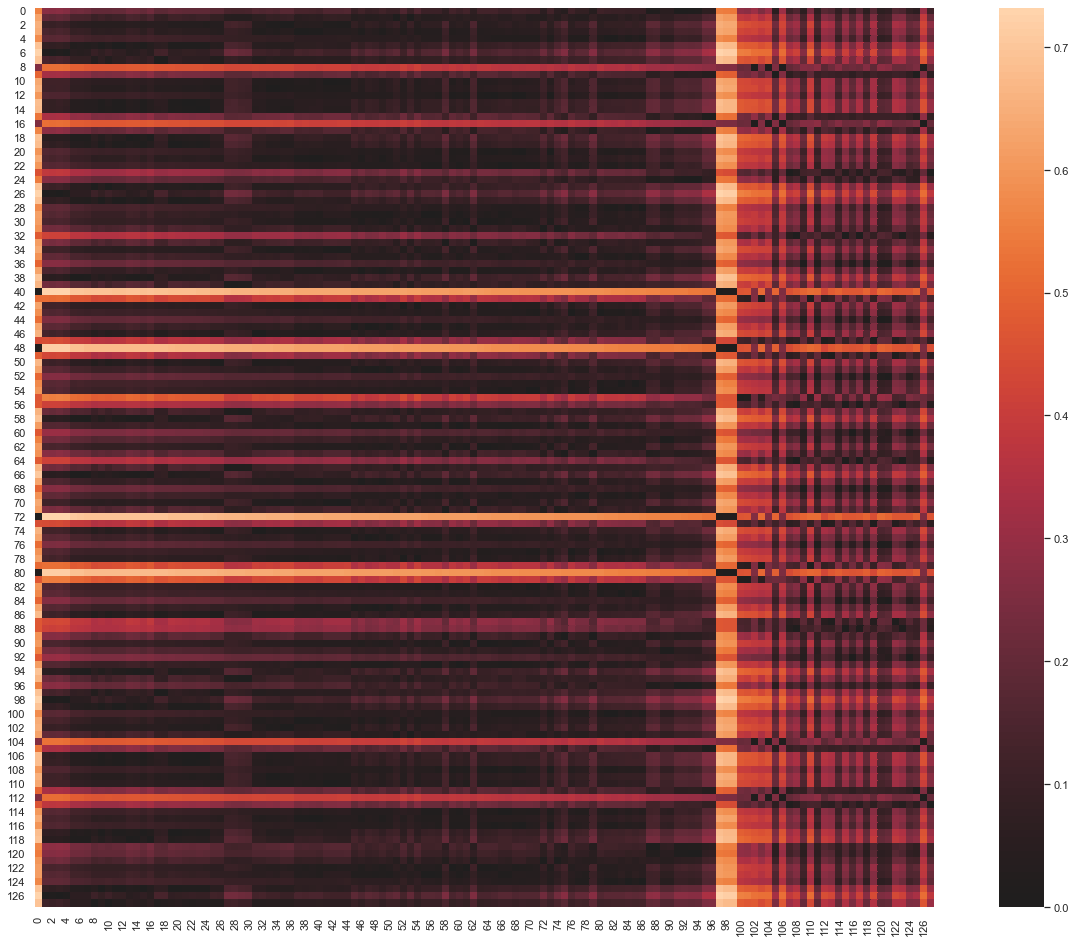

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
scale = 2
wd = 11.7 * scale
ht = 8.27 * scale
sns.set(rc={'figure.figsize':(wd,ht)})
sns.heatmap(A[:,buddies],annot=False,center=0,vmax=A.max(),vmin=A.min(),square=True)
plt.show()

In [20]:
for n in G:
    print(n,G[n])

0 {40: {'w': 0.5531900000000001}, 48: {'w': 0.5437000000000001}, 72: {'w': 0.5550299999999999}, 80: {'w': 0.5415}}
40 {0: {'w': 0.5531900000000001}, 1: {'w': 0.62358}, 2: {'w': 0.65062}, 3: {'w': 0.63976}, 4: {'w': 0.5779099999999999}, 5: {'w': 0.69129}, 6: {'w': 0.72909}, 7: {'w': 0.6896}, 10: {'w': 0.63646}, 11: {'w': 0.65185}, 12: {'w': 0.59906}, 13: {'w': 0.68083}, 14: {'w': 0.67635}, 15: {'w': 0.5343500000000001}, 17: {'w': 0.56243}, 18: {'w': 0.69217}, 19: {'w': 0.68096}, 20: {'w': 0.59406}, 21: {'w': 0.6383099999999999}, 22: {'w': 0.59896}, 24: {'w': 0.54161}, 25: {'w': 0.69207}, 26: {'w': 0.7302299999999999}, 27: {'w': 0.69099}, 28: {'w': 0.5697}, 29: {'w': 0.61537}, 30: {'w': 0.61163}, 31: {'w': 0.59128}, 33: {'w': 0.6129399999999999}, 34: {'w': 0.63489}, 35: {'w': 0.58645}, 37: {'w': 0.62532}, 38: {'w': 0.70021}, 39: {'w': 0.66225}, 42: {'w': 0.62292}, 43: {'w': 0.58627}, 45: {'w': 0.6285400000000001}, 46: {'w': 0.65732}, 50: {'w': 0.66998}, 51: {'w': 0.6251899999999999}, 53:

In [62]:
buddies = []
KS = nx.Graph()
p = np.percentile(np.abs(A.flatten()),50)
m = A.max()
for i in range(128):
    for j in range(128):
        if i == j:
            continue
        if A[i,j] > p:
            KS.add_edge(i,j,w=m/A[i,j])
KSS = sorted([[A[e],e] for e in KS.edges()])  #ordered by highest weighted edges first
KSG = nx.Graph()
for i in range(len(KSS)):
    #print(KSS[i][1])
    source = KSS[i][1][0]
    SSP = nx.Graph()
    T = nx.single_source_shortest_path(KS,source=source,cutoff=3)
    nx.add_path(SSP,T)
    print(list(set([e for e in SSP.edges()]))[:4])

[(86, 87), (62, 64), (125, 126), (33, 36)]
[(65, 67), (100, 101), (17, 20), (40, 41)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(82, 86), (86, 87), (62, 64), (125, 126)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(54, 55), (86, 87), (100, 101), (125, 126)]
[(86, 87), (62, 64), (125, 126), (33, 36)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(86, 87), (62, 64), (125, 126), (23, 60)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (33, 36), (40, 41), (72, 73)]
[(82, 86), (86, 87), (62, 64), (125, 126)]
[(54, 55), (86, 87), (100, 101), (125, 126)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(90, 0), (40, 41), (72

[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(65, 67), (54, 55), (38, 50), (92, 93)]
[(86, 87), (62, 64), (125, 126), (33, 36)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(54, 55), (86, 87), (125, 126), (28, 124)]
[(82, 86), (86

[(54, 55), (100, 101), (125, 126), (86, 90)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (100, 101), (125, 126), (86, 90)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (100, 101), (125, 126), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (100, 101), (125, 126), (86, 90)]
[(65, 67), (54, 55), (92, 93), (100, 101)]
[(65, 67), (54, 55), (92, 93), (100, 101)]
[(39, 46), (86, 90), (40, 41), (72, 73)]
[(54, 55), (100, 101), (125, 126), (86, 90)]
[(86, 87), (62, 64), (125, 126), (33, 36)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (86, 87), (100, 101), (125, 126)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(64, 0), (54, 55), (100, 101), (125, 126)]
[(54, 55), (100, 101), (125, 126), (86, 90)]
[(65, 67), (54, 55), (92, 93), (100, 101)]
[(54, 55), (100, 101), (125, 126), (86, 90)]
[(54, 55), (100, 101), (125, 126), (86, 90)]
[(125, 126), (86, 90), (33, 36), 

[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(54, 55), (100, 101), (125, 126), (86, 90)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(65, 67), (54, 55), (38, 50), (92, 93)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(65, 67), (54, 55), (38, 50), (92, 93)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(64, 0), (54, 55), (100, 101), (125, 126)]
[(54, 55), (100, 101), (125, 126), (86, 90)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (100, 101), (125, 126), (86, 90)]
[(86, 87), (62, 64), (125, 126), (33, 36)]
[(54, 55), (100, 101), (125, 126), (86, 90)]
[(54

[(65, 67), (54, 55), (92, 93), (100, 101)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(65, 67), (54, 55), (92, 93), (100, 101)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(54, 55), (100, 101), (125, 126), (86, 90)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(65, 67), (54, 55), (92, 93), (100, 101)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(86, 90), (33, 36), (40, 41), (72, 73)]
[(86, 87), (62, 64), (125, 126), (33, 36)]
[(54, 55)

[(125, 126), (115, 122), (86, 90), (40, 41)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(86, 90), (33, 36), (40, 41), (72, 73)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(54, 55), (100, 101), (125, 126), (111, 0)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (100, 101), (125, 126), (111, 0)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(54, 55), (100, 101), (125, 126), (111, 0)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(86, 90), (33, 36), (40, 41), (72, 73)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(65, 67), (54, 55), (92, 93), (100, 101)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(1

[(54, 55), (100, 101), (125, 126), (23, 60)]
[(86, 87), (62, 64), (125, 126), (33, 36)]
[(54, 55), (100, 101), (125, 126), (111, 0)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(64, 0), (54, 55), (100, 101), (125, 126)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (100, 101), (125, 126), (111, 0)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(54, 55), (100, 101), (125, 126), (111, 0)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(125, 126), (86, 90), (40, 41), (7

[(54, 55), (92, 93), (100, 101), (125, 126)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(86, 87), (62, 64), (125, 126), (33, 36)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(64, 0), (54, 55), (100, 101), (125, 126)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(64, 0), (54, 55), (100, 101), (125, 126)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(86, 90), (33, 36), (40, 41), (72, 73)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(125, 126), (86, 90), (33, 36), (40, 41

[(125, 126), (86, 90), (33, 36), (40, 41)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(39, 46), (86, 90), (40, 41), (72, 73)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(86, 90), (33, 36), (40, 41), (72, 73)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(65, 67), (54, 55), (92, 93), (100, 101)]
[(65, 67), (54, 55), (92, 93), (100, 101)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(64, 0), (54, 55), (100, 101), (125, 126)]
[(65, 67), (54, 55), (92, 93), (1

[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(65, 67), (54, 55), (38, 50), (92, 93)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(8

[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(65, 67), (54, 55), (38, 50), (92, 93)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(54, 55), (92, 93), (100, 101), (125, 126)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(65, 67), (54, 55), (38, 50), (92, 93)]

[(86, 90), (40, 41), (72, 73), (18, 19)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(125, 126), (115, 122), (86, 90), (40, 41)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(86, 87), (92, 93), (100, 101), (125, 1

[(86, 87), (92, 93), (100, 101), (125, 126)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(65, 67), (54, 55), (38, 50), (92, 93)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(65, 67), (54, 55), (38, 50), (92, 93)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(64, 0), (54, 55), (100, 101), (125, 126)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(65, 67), (54, 55), (38, 50), (92, 93)]
[(39, 46), (86, 90), (40, 41), (72, 73)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(

[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[(54, 55), (100, 101), (125, 126), (23, 60)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(86, 87), (92, 93), (100, 101), (125, 126)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(92, 93), (100, 101), (125, 126), (18, 19)]
[

[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), 

[(125, 126), (86, 90), (40, 41), (72, 73)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(86, 90), (40, 41), (72, 73), (18, 19)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(125, 126), (86, 90), (33, 36), (40, 41)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(125, 126), (86, 90), (40, 41), (72, 73)]
[(65, 67), (54, 55), (92, 93), (100, 101)]
[(65, 67), (54, 55), (92, 93), (100, 101)]
[(54, 55), (86, 87), (92, 93), (100, 101)]
[(65, 67), (5

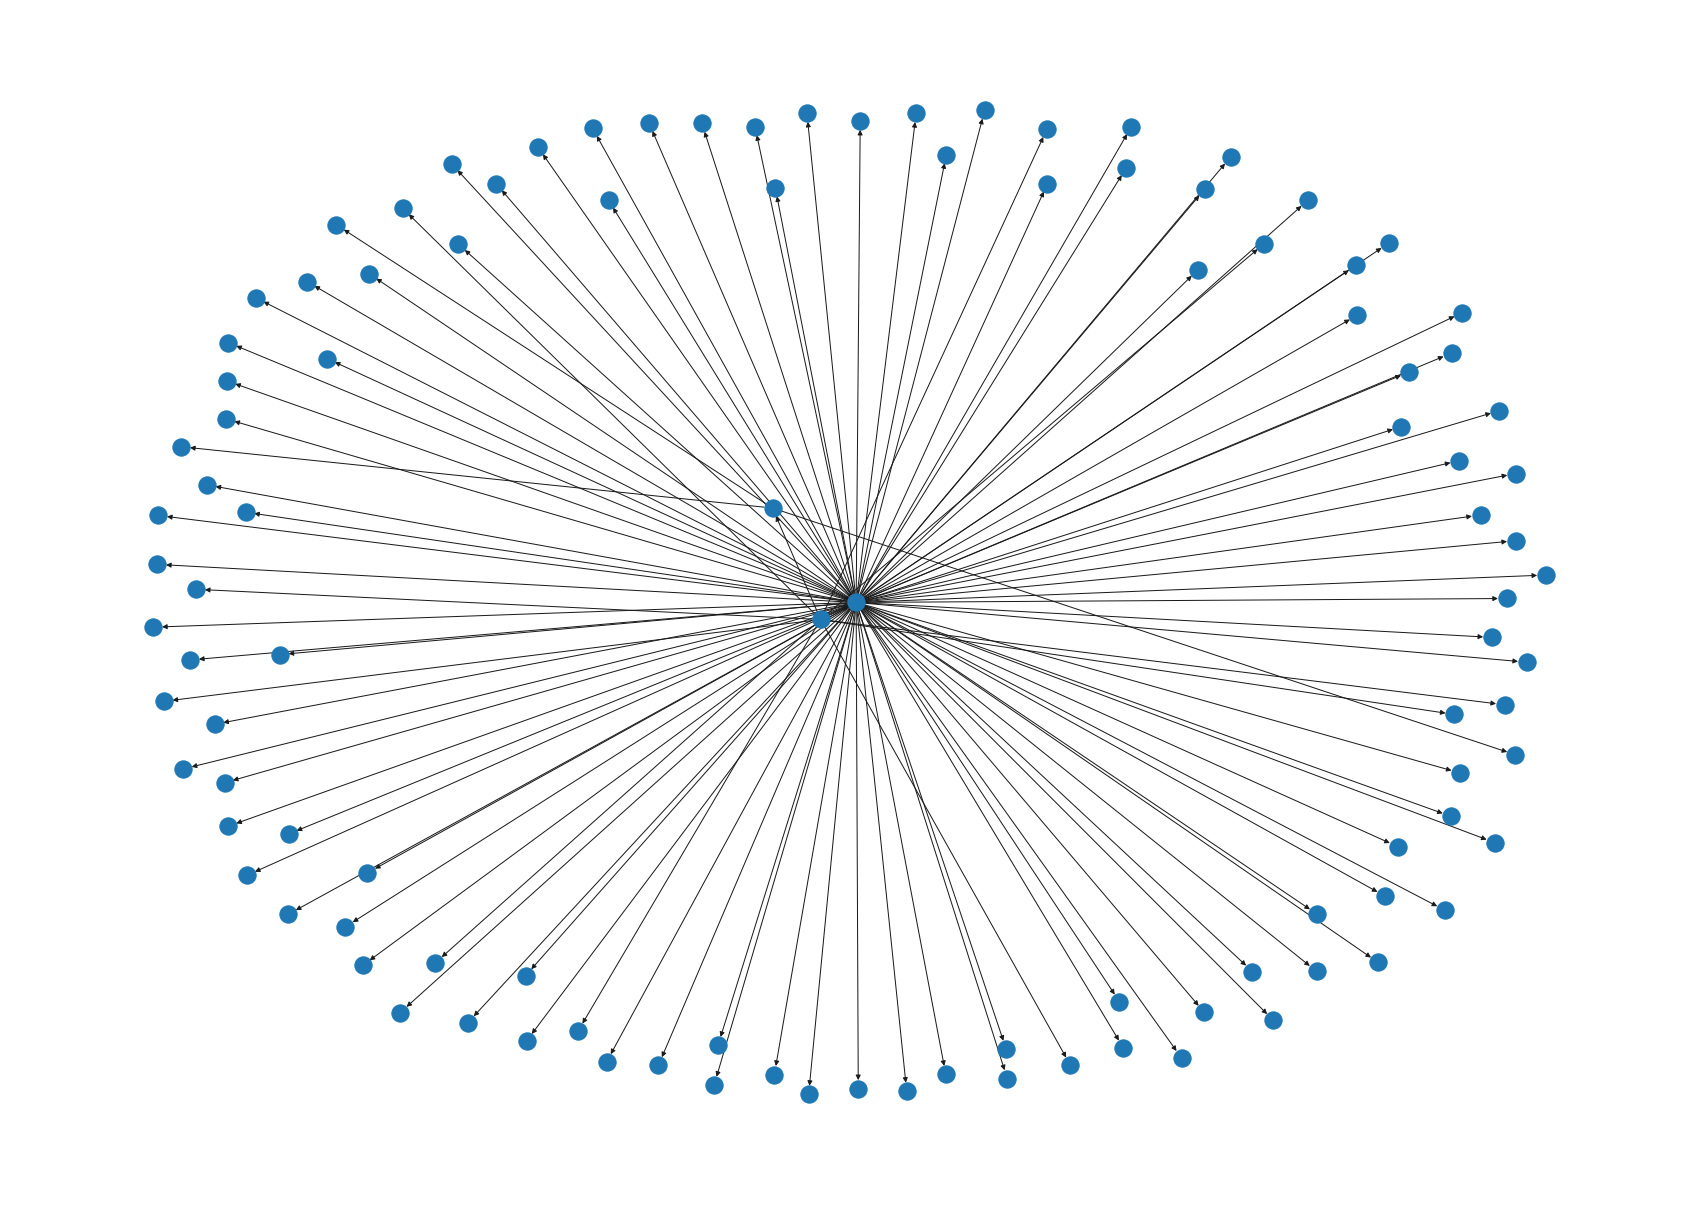

In [32]:
nx.draw(T)

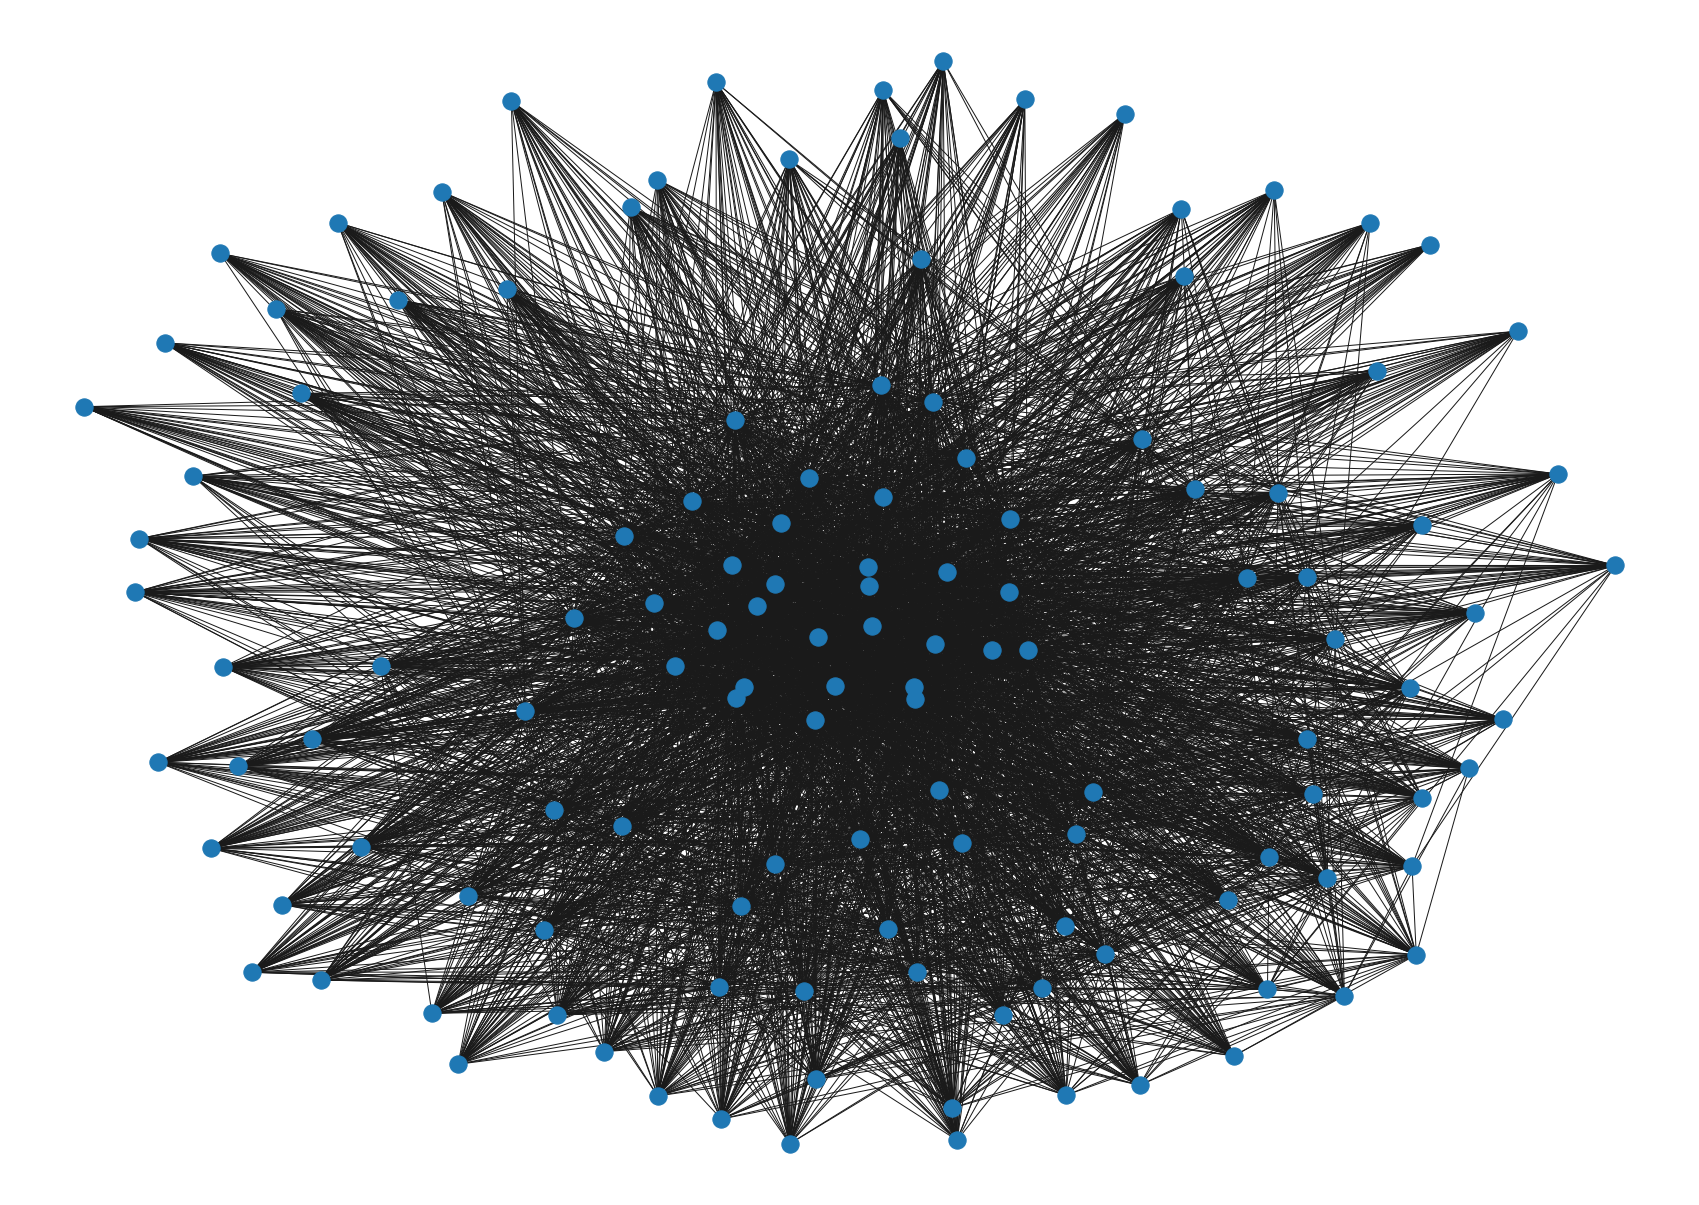

In [33]:
MC = nx.Graph()
p = np.percentile(np.abs(A.flatten()),50)
for i in range(128):
    for j in range(128):
        if i == j:
            continue
        if A[i,j] > p:
            MC.add_edge(i,j,w=A[i,j])
nx.draw(MC)

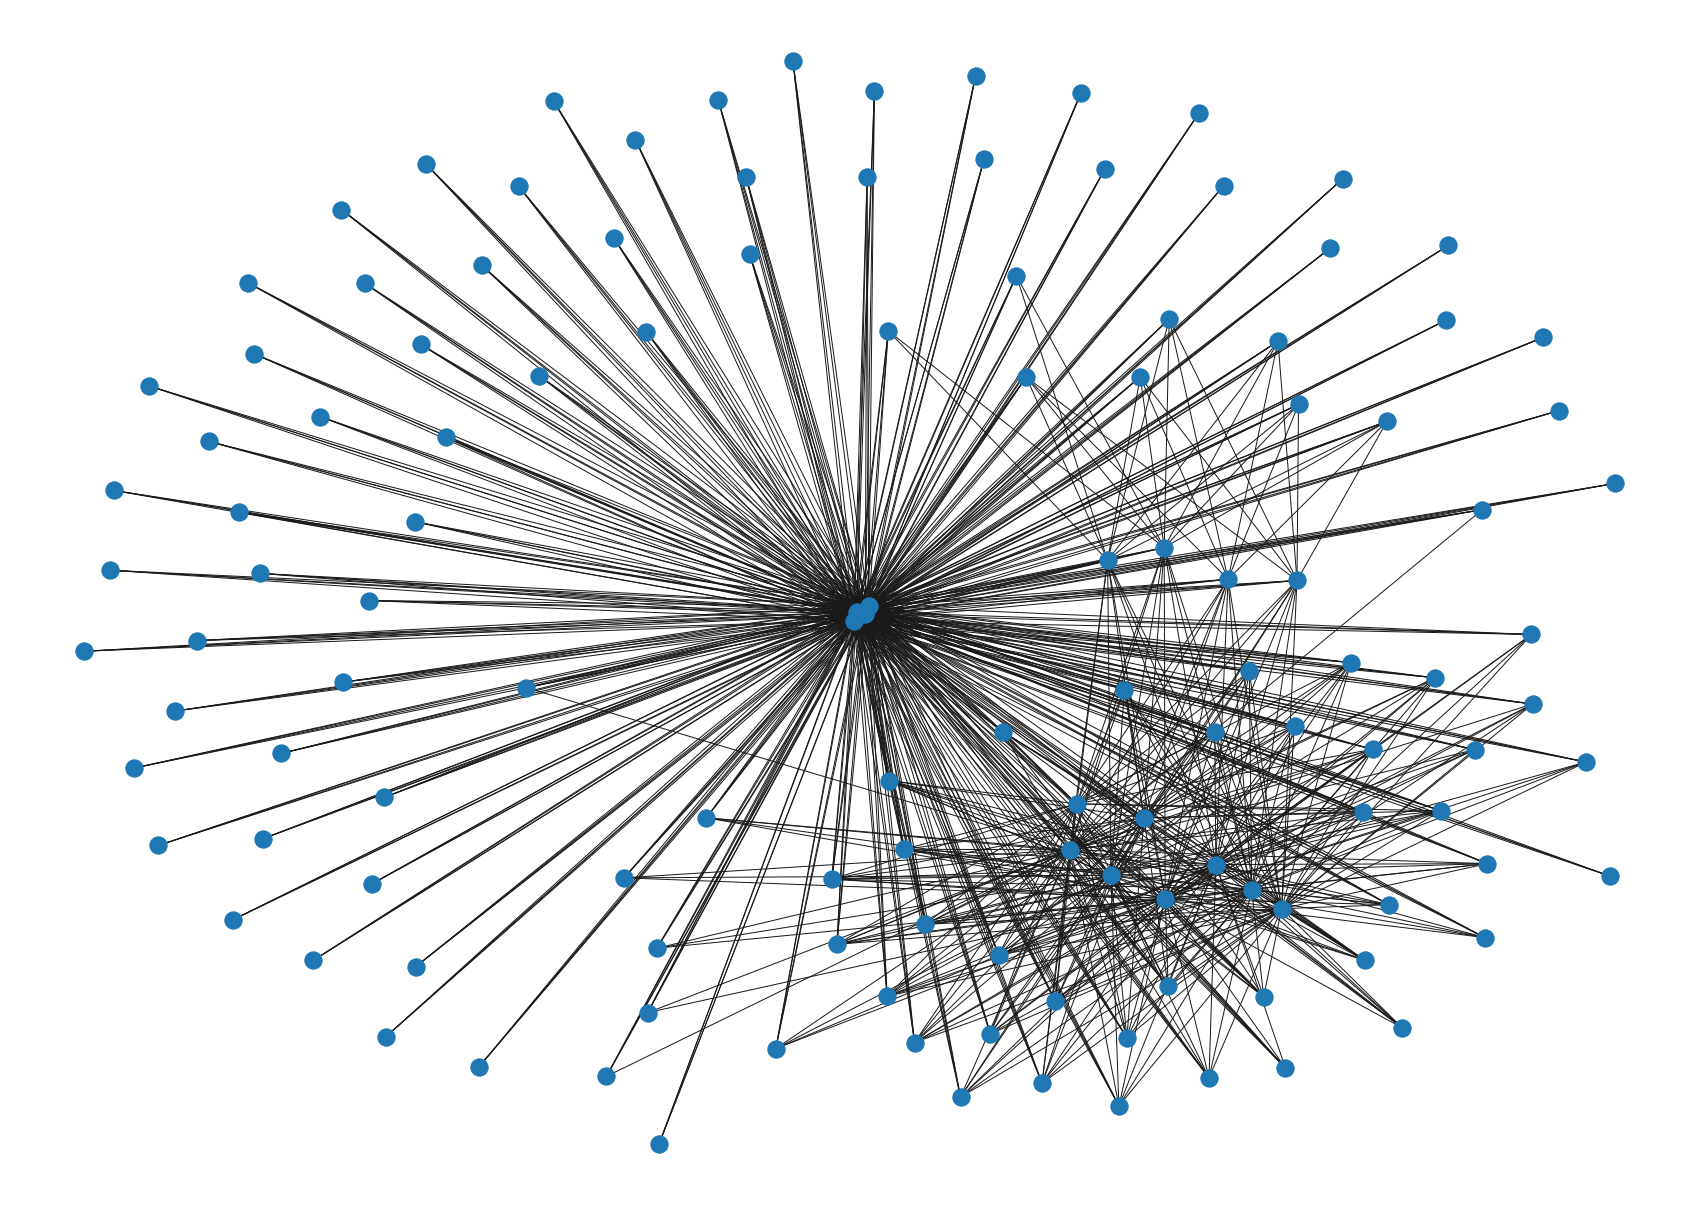

In [24]:
MC = nx.Graph()
p = np.percentile(np.abs(A.flatten()),90)
m = A.max()
#print(p)
for i in range(128):
    for j in range(128):
        if i == j:
            continue
        if A[i,j] > p:
            MC.add_edge(i,j,w=m/A[i,j])
nx.draw(MC)